In [1]:
# Steven Locorotondo
# group project

# notes: value at risk for further analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [3]:
stocks = pd.read_csv('SP_500_close_2015.csv')

In [4]:
stocks.head()

,Date,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
0,2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
1,2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2,2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
3,2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
4,2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878


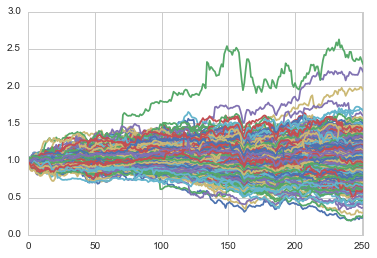

In [5]:
# normalize all stock prices to 1, divide every entry of a column by its first entry

prices = stocks.drop(['Date'], axis = 1)   # drop 'Date' column

def normalize(dframe):
    for col in dframe:
        dframe[col] = dframe[col] / dframe[col][0]
    return dframe

prices_norm = normalize(prices)

prices_norm.plot(legend = False)

In [6]:
# make dframe with returns
stock_returns = stocks["Date"]
stock_returns = pd.DataFrame(stock_returns)
for i in range(1,len(stocks.columns)):
    stock_returns[stocks.columns[i]] = stocks[stocks.columns[i]].pct_change()
    
stock_returns = stock_returns.dropna()

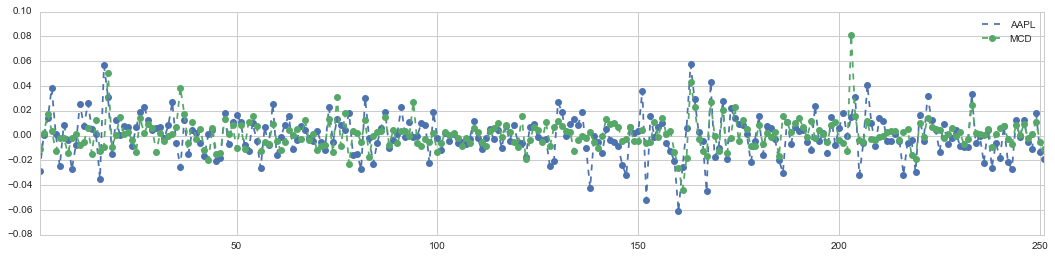

In [7]:
# function to plot returns over a year
def plot_daily_returns(stock_ticker):
    return stock_returns[stock_ticker].plot(figsize=(18,4),legend=True, linestyle='--', marker='o');
    
plot_daily_returns('AAPL')
plot_daily_returns('MCD')

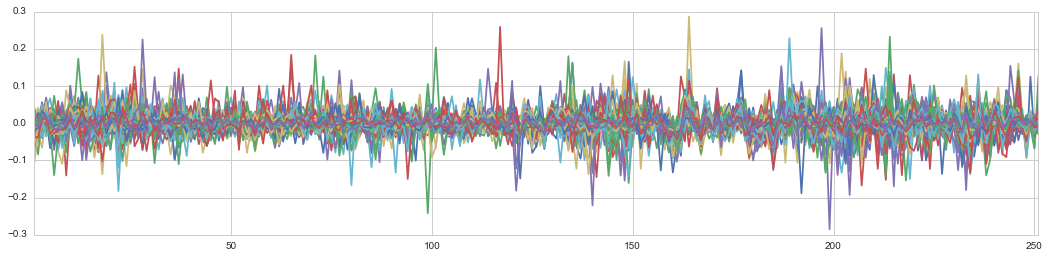

In [8]:
# plot returns for all the stocks

stock_returns.plot(legend = False, figsize=(18,4))

In [9]:
# function that returns company name using stock ticker
def get_name(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)

    result = requests.get(url).json()

    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

print(get_name("AAPL"))

Apple Inc.


In [10]:
# 2.1 function that calculates correlations between all columns

def get_corr(stock_data):
    """stock_data is a dataframe with dates as a first column and stock ticker for all subsequent columns
    the columns contain daily returns for respective stocks
    """
    # get all column names minus the first one
    col_names = stock_data.columns.values[1:]

    # make empty dframe with colnames as rownames
    all_corr = pd.DataFrame(columns = col_names, index = col_names)

    # make dframe with correlation between all companies
    for i in range(1,len(stock_data.columns)):
        for j in range(1,len(stock_data.columns)):
            temp = stocks[[stock_data.columns[i], stock_data.columns[j]]]
            corr = temp.corr(method = 'pearson')
            value = corr.ix[0, 1]
            all_corr.ix[i-1, j-1] = value
    return all_corr

corr_table = get_corr(stocks)
#### takes couple minutes to run! (+-5 mins)
corr_table.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1,0.2641,-0.0486122,-0.339348,-0.382178,-0.378558,-0.25483,-0.541397,0.320658,-0.478656,...,0.0507196,0.683549,0.000794803,-0.308476,0.620315,0.749605,-0.0815362,0.781872,-0.239086,0.193206
ABT,0.2641,1,0.794478,0.0633279,-0.257818,0.0609895,-0.0251609,-0.243363,0.617116,0.408628,...,-0.470723,0.0707519,0.0444439,0.371297,0.327286,0.324388,0.710363,0.39673,0.595002,0.834076
ABBV,-0.0486122,0.794478,1,0.0243531,-0.297206,-0.00707624,-0.125505,-0.0410658,0.633536,0.437528,...,-0.462226,-0.0712476,-0.0183374,0.230276,0.118476,0.231759,0.694264,0.239883,0.610541,0.654291
ACN,-0.339348,0.0633279,0.0243531,1,0.886703,0.926489,0.907655,0.512276,-0.54547,0.461759,...,0.261396,-0.795327,0.792622,0.813484,0.321481,-0.72698,-0.0538307,-0.719242,0.58789,0.192257
ATVI,-0.382178,-0.257818,-0.297206,0.886703,1,0.920191,0.942121,0.445306,-0.82653,0.27745,...,0.40666,-0.753772,0.75965,0.66881,0.23331,-0.822403,-0.314563,-0.775822,0.302798,-0.0152665


In [11]:
# 2.2 function to calculate correlations between to stocks

def get_corr(stock_ticker1, stock_ticker2):
    temp = stock_returns[[stock_ticker1, stock_ticker2]]
    corr = temp.corr(method = 'pearson')
    company_name1 = get_name(stock_ticker1)
    company_name2 = get_name(stock_ticker2)
    value = corr[stock_ticker1][1]
    print ("The correlation between %s and %s is %.2f." % (company_name1, company_name2, value))

get_corr("AAPL", "MSFT")

The correlation between Apple Inc. and Microsoft Corporation is 0.52.


In [12]:
# 2.3 function to print out top and bottom correlated company for any given company

def get_top_bottom_corr(stock_ticker):
    '''
    Input: stock ticker
    Output: lowest and highest correlated stocks for input ticker
    '''
    # takes a stock ticker as argument, uses a correlation table to find top and bottom companies
    
    max_value = corr_table[stock_ticker][corr_table[stock_ticker] != 1].max()
    min_value = corr_table[stock_ticker][corr_table[stock_ticker] != 1].min()
    
    max_stock = corr_table[stock_ticker][corr_table[stock_ticker] != 1].idxmax()   # excludes 1 from max search
    min_stock = corr_table[stock_ticker].idxmin()
    
    company_name = get_name(stock_ticker)   # get full name of selected company
    max_company_name = get_name(max_stock)   # get full company name for max correlated company
    min_company_name = get_name(min_stock)   # get full company name for min correlated company
    
    print("The top correlated company for %s is %s with a correlation of %.2f." % (company_name, max_company_name, max_value))
    print("The bottem correlated company for %s is %s with a correlation of %.2f." % (company_name, min_company_name, min_value))
    
get_top_bottom_corr("GE")

The top correlated company for General Electric Company is McDonald's Corp. with a correlation of 0.91.
The bottem correlated company for General Electric Company is Harley-Davidson, Inc. with a correlation of -0.84.


In [13]:
# test graph problem on small portion of correlation table
test = corr_table.ix[0:4,0:4]
test

,MMM,ABT,ABBV,ACN
MMM,1,0.2641,-0.0486122,-0.339348
ABT,0.2641,1,0.794478,0.0633279
ABBV,-0.0486122,0.794478,1,0.0243531
ACN,-0.339348,0.0633279,0.0243531,1


In [14]:
list = []
edge = ()

for i in range(len(corr_table)):
    edge = edge + (corr_table.ix[0,i],)
    list.append(edge)
    edge = ()
    
for i in range(len(list)):
    list[i] = list[i] + (corr_table.index[0],)
    
for i in range(len(list)):
    list[i] = list[i] + (corr_table.index[i],)

In [15]:
# algorithm to extract all correlations and respective stocks

list = []
list_count = 0   # count for the number of tuples in list
col_count = 0   # count for columns, every new column start at a lower row (skip one row every iteration)
edge = ()   # intialize empty tuple (set)

for i in range(len(corr_table)):
    for j in range(1, len(corr_table) - i):
        # reduce length of column at every iteration, otherwise repetitions go beyond length of column
        
        edge = edge + (corr_table.ix[j + col_count, i], )   # copy weight of edge from table (correlation)
        list.append(edge)
        
        list[list_count] = list[list_count] + (corr_table.columns[i], )   # append column index (stock)
        list[list_count] = list[list_count] + (corr_table.index[j + col_count], )   # append row index (stock)
        
        edge = ()   # re-initialize edge for next iteration
        list_count += 1   # counter for position in list
        
    col_count += 1   # used to start next iteration at a lower row
    

In [16]:
list

[(0.26409984123662011, 'MMM', 'ABT'),
 (-0.048612222364507116, 'MMM', 'ABBV'),
 (-0.33934774933095124, 'MMM', 'ACN'),
 (-0.382177525909353, 'MMM', 'ATVI'),
 (-0.37855773172879897, 'MMM', 'AYI'),
 (-0.25482957676274515, 'MMM', 'ADBE'),
 (-0.54139654151808148, 'MMM', 'AAP'),
 (0.32065812579414482, 'MMM', 'AES'),
 (-0.47865637611293427, 'MMM', 'AET'),
 (0.53299466068102219, 'MMM', 'AMG'),
 (0.43045704824794001, 'MMM', 'AFL'),
 (0.72653432377622174, 'MMM', 'A'),
 (0.69371748377833287, 'MMM', 'APD'),
 (-0.10443798843282592, 'MMM', 'AKAM'),
 (-0.6126434527124639, 'MMM', 'ALK'),
 (0.61674803753753915, 'MMM', 'ALB'),
 (0.66304627902378321, 'MMM', 'AA'),
 (0.21738439854118821, 'MMM', 'ALXN'),
 (-0.13349801794048288, 'MMM', 'ALLE'),
 (-0.048882275177080006, 'MMM', 'AGN'),
 (0.72921909168714638, 'MMM', 'ADS'),
 (0.53253782706791497, 'MMM', 'LNT'),
 (0.83225247053404028, 'MMM', 'ALL'),
 (-0.39709850370460431, 'MMM', 'GOOGL'),
 (-0.32427609446263345, 'MMM', 'GOOG'),
 (-0.22590311134274052, 'MMM', '

In [17]:
# sort list of edges in descending order

sorted_list = sorted(list)[::-1]

In [18]:
sorted_list

[(0.99999999999959321, 'JCI', 'TYC'),
 (0.99485874477465808, 'GOOGL', 'GOOG'),
 (0.98985998770348471, 'FOXA', 'FOX'),
 (0.98518791557009378, 'DVN', 'MRO'),
 (0.98240771028400475, 'AMZN', 'TSS'),
 (0.98135345728047096, 'IP', 'LM'),
 (0.97955084760236466, 'ORLY', 'SBUX'),
 (0.97943158324914181, 'DISCA', 'DISCK'),
 (0.9785718677805948, 'CMI', 'NRG'),
 (0.97720906062684909, 'FMC', 'MON'),
 (0.97689049412512774, 'GPN', 'TSS'),
 (0.97645638987021288, 'NRG', 'SWN'),
 (0.97560501728461912, 'FLS', 'MUR'),
 (0.97397928395569466, 'CMS', 'XEL'),
 (0.97372346295242795, 'FMC', 'BEN'),
 (0.97361883188183596, 'APA', 'NBL'),
 (0.97354402973461474, 'BEN', 'MUR'),
 (0.97322684539969806, 'NWSA', 'NWS'),
 (0.97293528312798661, 'HD', 'VRSN'),
 (0.97263529154379902, 'STX', 'WDC'),
 (0.97257657126248709, 'FMC', 'IP'),
 (0.97237814356059582, 'BEN', 'LM'),
 (0.97214432703645548, 'FISV', 'SBUX'),
 (0.97206321110168969, 'ATVI', 'STZ'),
 (0.97177452228946859, 'MUR', 'NAVI'),
 (0.97169975105018214, 'FISV', 'TSS'),


In [19]:
# make list into data frame

edges_dframe = pd.DataFrame(sorted_list)

edges_dframe.columns = ["Correlation", "Source", "Destination"]   # assign appropriate names to columns

edges_dframe.head()

,Correlation,Source,Destination
0,1.000000,JCI,TYC
1,0.994859,GOOGL,GOOG
2,0.989860,FOXA,FOX
3,0.985188,DVN,MRO
4,0.982408,AMZN,TSS


In [20]:
edges_dframe[edges_dframe["Source"] == "AAPL"].head()

,Correlation,Source,Destination
5986,0.839634,AAPL,HOT
6106,0.837891,AAPL,LNC
6621,0.830841,AAPL,IR
6776,0.828834,AAPL,SPGI
6959,0.826326,AAPL,DNB


In [22]:
# create single node set for each node

dictio = {}

for i in corr_table.columns.values:
    dictio [i] = i

In [ ]:
# find 3 highest weighted edges for each set in dictionary

for i in dictio:
    
    parent = 

## Pairwise correlations

In order to get a quick understanding of how two stocks are correlated an investor might want to visualize pairwise correlations.

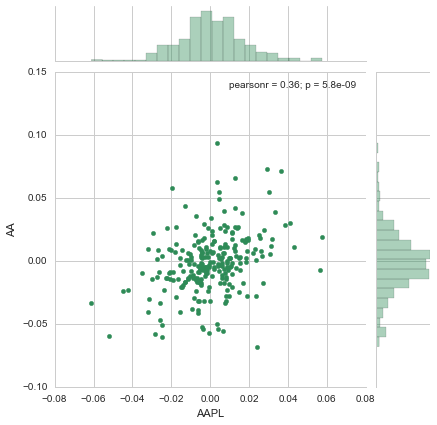

In [23]:
def pairwise_corr(ticker_1, ticker_2):
    '''
    input: two stock tickers
    output: pairwise correlation plot
    '''
    
    return sns.jointplot(ticker_1, ticker_2, stock_returns, kind='scatter', color='seagreen')

pairwise_corr("AAPL", "AA")

## Risk analysis

A basic way to quantify risk is to compare expected returns to the standard deviation of returns

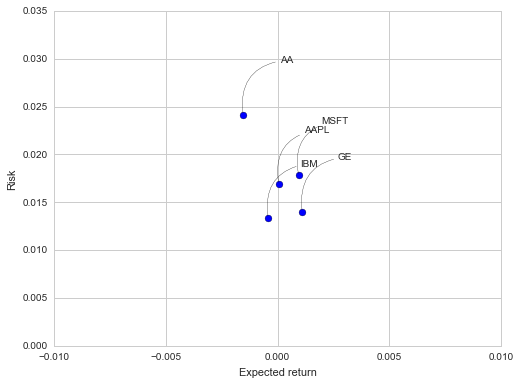

In [24]:
def risk_analysis(list_of_tickers):
    """ input: list of tickers as argument ex ['AAPL','MSFT']
        output: plot with expected return on x-axis and risk on y-axis (std)
        
        purpose: investor can compare the expected return and the risk involved with specific stocks
    """
    temp = stock_returns[list_of_tickers]

    area = np.pi * 15
    
    plt.figure(figsize = (8,6))
    plt.scatter(temp.mean(), temp.std(), s = area)
    plt.xlabel('Expected return')
    plt.ylabel('Risk')
    
    for label,x,y in zip(temp.columns, temp.mean(), temp.std()):
        plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=0.5'))
        
test = ['AAPL', 'MSFT', 'AA', 'GE', 'IBM']


risk_analysis(test)